# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
import matplotlib.pyplot as plt

In [3]:
#windows
#firefox
firefox_binary_path = "C:\\Program Files\\Mozilla Firefox\\firefox.exe"

options = Options()
options.binary_location = firefox_binary_path

driver_path = r"C:\Users\tigra\OneDrive\Desktop\geckodriver.exe"

service = Service(executable_path = driver_path)

#Use firefox instead of chrome as it works better
driver = webdriver.Firefox(service=service , options=options)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

driver.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [8]:
#Find the table
table = soup.find('table')

In [9]:
# Extract all rows of data

# Extract the table headers
headers = []
for th in table.find_all('th'):
    headers.append(th.get_text().strip())


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list

# Loop through the scraped data to create a list of rows

# Extract the table rows
rows = []
for tr in table.find_all('tr')[1:]:  # Skip the header row
    cells = tr.find_all('td')
    row = [cell.get_text().strip() for cell in cells]
    rows.append(row)


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

mars_df = pd.DataFrame(rows, columns=headers)


In [13]:
# Confirm DataFrame was created successfully

mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column

print(mars_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [16]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], errors='coerce')
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [17]:
# Confirm type changes were successful by examining data types again

print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?

num_months = mars_df['month'].max()
num_months

12

In [20]:
# 2. How many sols (Martian days) worth of data are there?

sols = len(mars_df)
sols

1867

In [21]:
# 3. What is the average minimum temperature by month?

avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

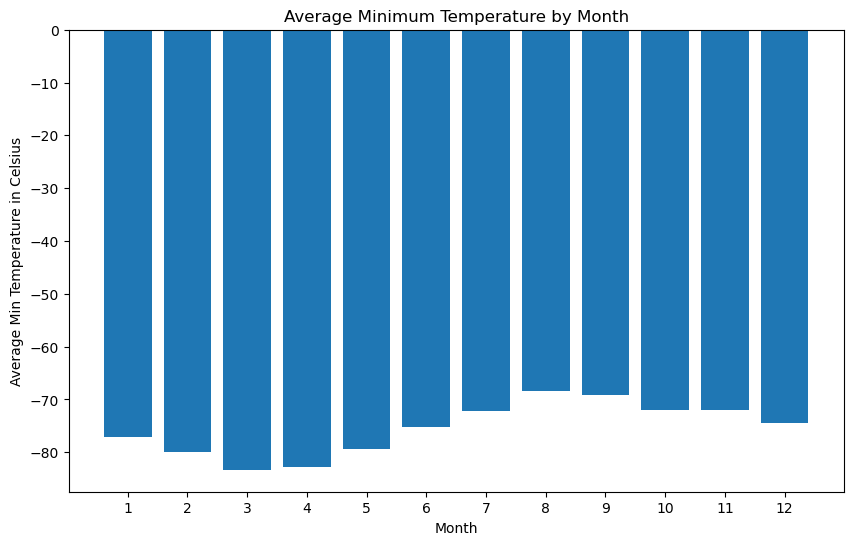

In [22]:
# Plot the average minimum temperature by month

plt.figure(figsize=(10, 6))

plt.bar(avg_min_temp.index, avg_min_temp.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Min Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')

plt.xticks(range(1, 13))

# Show the plot
plt.show()


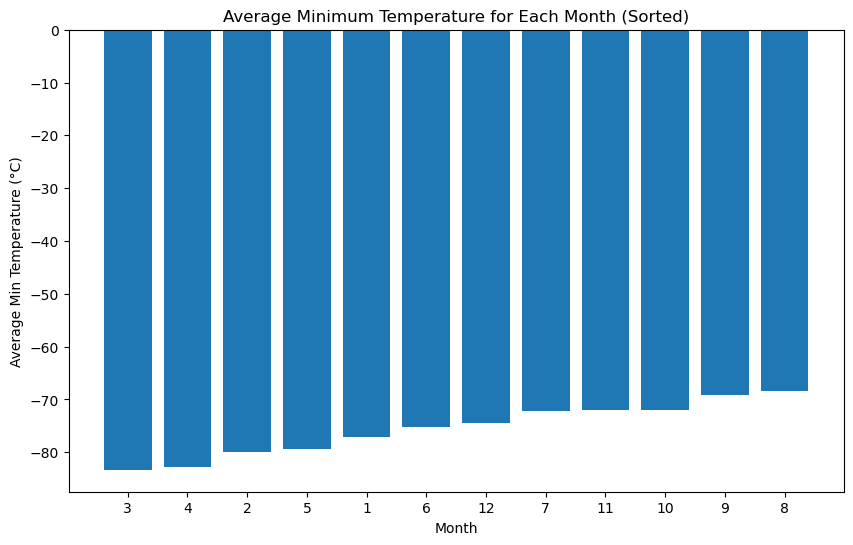

In [23]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

avg_min_temp_sorted = avg_min_temp.sort_values()

df_sorted = avg_min_temp_sorted.reset_index()
df_sorted.columns = ['Month', 'Average Min Temperature']

plt.figure(figsize=(10, 6))

#Convert the months to string so that the sorting works
plt.bar(df_sorted['Month'].astype(str), list(df_sorted['Average Min Temperature']))

plt.xlabel('Month')
plt.ylabel('Average Min Temperature (°C)') 
plt.title('Average Minimum Temperature for Each Month (Sorted)')


# Show the plot
plt.show()

In [24]:
avg_min_temp_sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [25]:
list(df_sorted['Month'])

[3, 4, 2, 5, 1, 6, 12, 7, 11, 10, 9, 8]

In [26]:
# 4. What is the average pressure by month?

avg_month_pressure = mars_df.groupby('month')['pressure'].mean()
avg_month_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

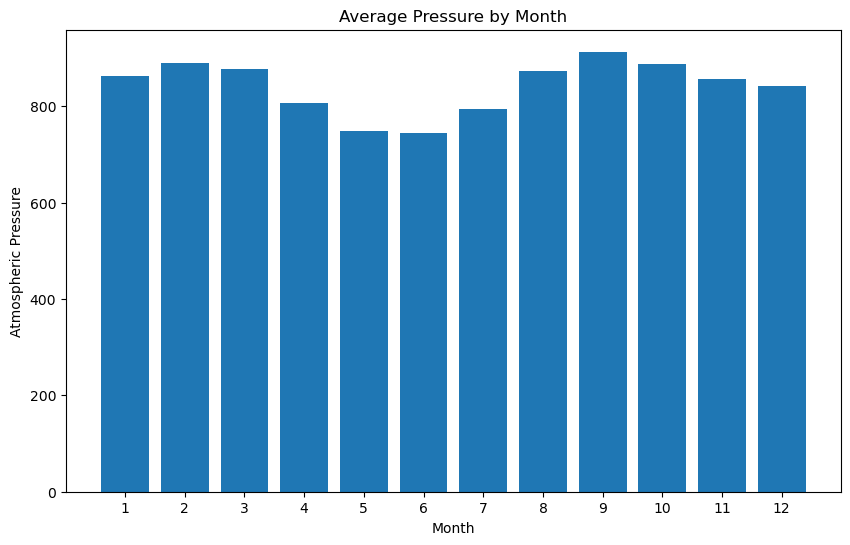

In [27]:
# Plot the average pressure by month

plt.figure(figsize=(10, 6))

plt.bar(avg_month_pressure.index, avg_month_pressure.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')

plt.xticks(range(1, 13))

# Show the plot
plt.show()

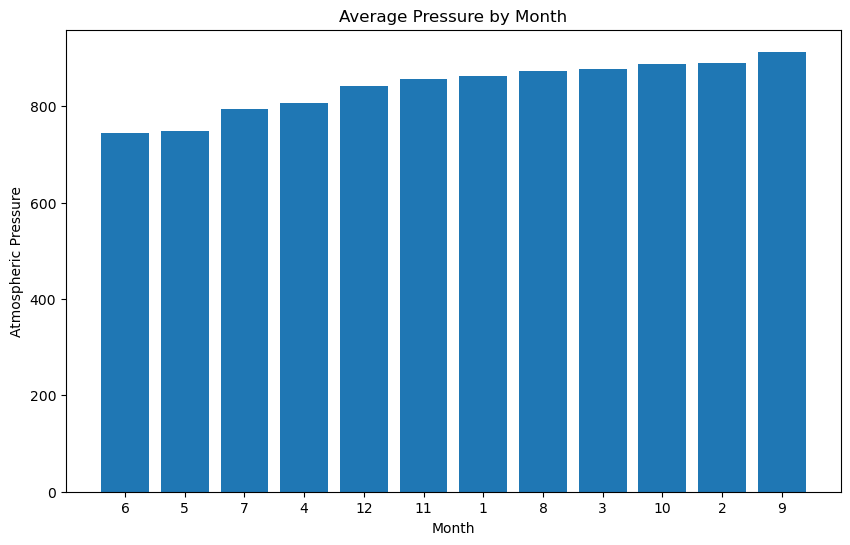

In [28]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

avg_month_pressure_sorted = avg_month_pressure.sort_values()

df_pressure_sorted = avg_month_pressure_sorted.reset_index()
df_pressure_sorted.columns = ['Month', 'Average Pressure']

plt.figure(figsize=(10, 6))

#Convert the months to string so that the sorting works
plt.bar(df_pressure_sorted['Month'].astype(str), list(df_pressure_sorted['Average Pressure']))

plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')


# Show the plot
plt.show()


In [29]:
#Calculate the number of mars days
mars_df[mars_df['ls'] == 359]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
302,316,2013-07-30,349,359,12,-75.0,852.0
303,318,2013-07-31,350,359,12,-76.0,853.0
923,955,2015-06-17,1017,359,12,-78.0,850.0
924,956,2015-06-18,1018,359,12,-79.0,850.0
1577,1607,2017-05-04,1686,359,12,-75.0,838.0
1578,1608,2017-05-05,1687,359,12,-75.0,838.0


In [30]:
#On 2013-07-31 and 2015-06-18 the ls is identical. Taking the number of days between these two dates gives us the number of days in a martial year

date1 = datetime.strptime('2013-07-31', '%Y-%m-%d')
date2 = datetime.strptime('2015-06-18', '%Y-%m-%d')

# Calculate the difference between the two dates
delta = date2 - date1

# Get the number of days
mars_days = delta.days

mars_days

#687 days in a mars year!

687

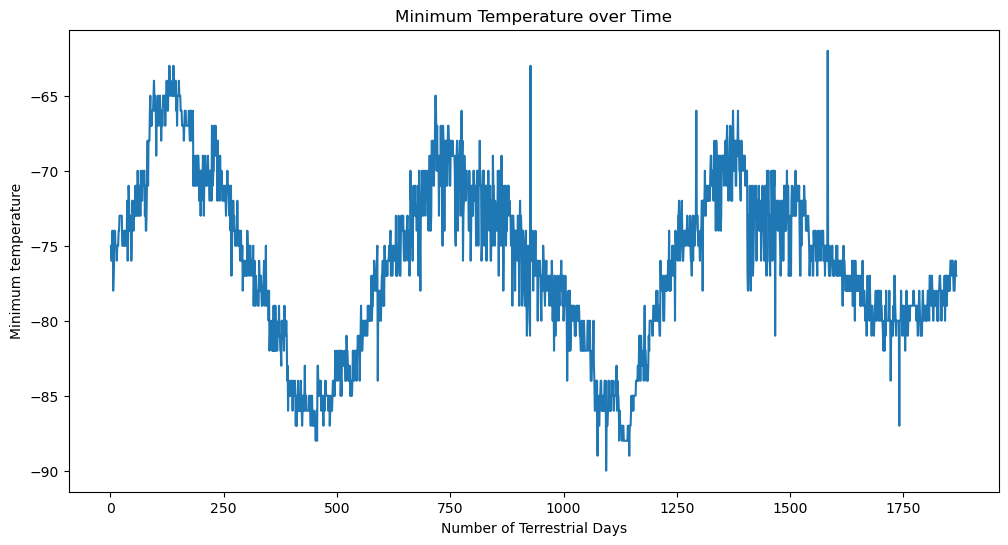

In [31]:
# 5. How many terrestrial (Earth) days are there in a Martian year?

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

#The length of the df is the number of terrestrial days
terrestrial_days = range(1, (len(mars_df) + 1))

plt.figure(figsize=(12, 6))

plt.plot(terrestrial_days, mars_df['min_temp'], linestyle='-')

plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum temperature')  # Adjust the unit based on your data
plt.title('Minimum Temperature over Time')


# Show the plot
plt.show()

#### Minimum Temperature

The minimum temperature oscillates in the form of a sine or cosine function, which is similar to temperature fluctuations on Earth. Coldest month on Mars is March, while the hottest is August.

#### Atmospheric Pressure

The atmospheric pressure also seems to oscillate but on a much smaller scale compared to the minimum temperature. Also, the atmospheric temperature on Mars is less than 1 percent of sea level pressure on Earth.

#### Year Length

A year on Mars takes considerably longer than a year on Earth. A year on Mars is equivalent to 687 days on Earth. This is to be expected as Mars is further away from the sun and takes longer to orbit it.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [36]:
# Write the data to a CSV

file_path = 'mars_data.csv'

# Export the DataFrame to a CSV file
mars_df.to_csv(file_path, index=False)


In [37]:
driver.quit()